In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [272]:
df=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [273]:
df.shape

(246, 14)

In [274]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [276]:
df.nunique()

day             33
month            5
year             2
Temperature     20
 RH             63
 Ws             19
Rain            40
FFMC           174
DMC            167
DC             199
ISI            107
BUI            175
FWI            128
Classes          9
dtype: int64

In [277]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [278]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [279]:
df.loc[:122,'Region']=0
df.loc[122:,'Region']=1

In [280]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [281]:
df.Region=df.Region.astype(int)

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 28.0+ KB


In [283]:
df=df.dropna().reset_index(drop=True)

In [284]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [285]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [286]:
df.dtypes

day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int32
dtype: object

In [287]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [288]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [289]:
df=df.drop(122).reset_index(drop=True)

In [290]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [291]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [292]:
df.columns=df.columns.str.strip()

In [293]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [294]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [295]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [296]:
df.dtypes

day             int32
month           int32
year            int32
Temperature     int32
RH              int32
Ws              int32
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int32
dtype: object

In [297]:
df[['Rain','FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain','FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [298]:
df.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int32
dtype: object

In [299]:
df.drop(['day', 'month', 'year'],inplace=True,axis=1)

In [300]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [301]:
df.Classes.value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [302]:
df.Classes=np.where(df.Classes.str.contains("not fire"),0,1)

In [303]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [304]:
df.Classes.value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [305]:
## Independent And dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [306]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [307]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [308]:
from sklearn.model_selection import train_test_split

In [309]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=43)

In [310]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [311]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.659120,-0.313004,-0.329720,0.701060,0.502747,0.393587,0.630473,0.476795,0.565026,0.299316
RH,-0.659120,1.000000,0.312190,0.245762,-0.670875,-0.399709,-0.227840,-0.703401,-0.346836,-0.491651,-0.435075
Ws,-0.313004,0.312190,1.000000,0.160958,-0.227260,-0.019928,0.045396,-0.017229,0.004554,-0.120561,-0.198738
Rain,-0.329720,0.245762,0.160958,1.000000,-0.555931,-0.275293,-0.287197,-0.348926,-0.285114,-0.390323,-0.046784
FFMC,0.701060,-0.670875,-0.227260,-0.555931,1.000000,0.592479,0.493368,0.746844,0.575405,0.782283,0.237565
DMC,0.502747,-0.399709,-0.019928,-0.275293,0.592479,1.000000,0.882414,0.679640,0.984318,0.583017,0.205296
DC,0.393587,-0.227840,0.045396,-0.287197,0.493368,0.882414,1.000000,0.513896,0.949592,0.485008,-0.085764
ISI,0.630473,-0.703401,-0.017229,-0.348926,0.746844,0.679640,0.513896,1.000000,0.637470,0.742329,0.288159
BUI,0.476795,-0.346836,0.004554,-0.285114,0.575405,0.984318,0.949592,0.637470,1.000000,0.567145,0.100737
Classes,0.565026,-0.491651,-0.120561,-0.390323,0.782283,0.583017,0.485008,0.742329,0.567145,1.000000,0.200545


In [312]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                col_corr.add(corr_matrix.columns[i])
    return col_corr

In [313]:
corr_feature=correlation(X_train,0.85)

In [314]:
corr_feature

{'BUI', 'DC'}

In [315]:
X_train.drop(corr_feature,axis=1,inplace=True)
X_test.drop(corr_feature,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [316]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
Temperature,1.000000,-0.659120,-0.313004,-0.329720,0.701060,0.502747,0.630473,0.565026,0.299316
RH,-0.659120,1.000000,0.312190,0.245762,-0.670875,-0.399709,-0.703401,-0.491651,-0.435075
Ws,-0.313004,0.312190,1.000000,0.160958,-0.227260,-0.019928,-0.017229,-0.120561,-0.198738
Rain,-0.329720,0.245762,0.160958,1.000000,-0.555931,-0.275293,-0.348926,-0.390323,-0.046784
FFMC,0.701060,-0.670875,-0.227260,-0.555931,1.000000,0.592479,0.746844,0.782283,0.237565
DMC,0.502747,-0.399709,-0.019928,-0.275293,0.592479,1.000000,0.679640,0.583017,0.205296
ISI,0.630473,-0.703401,-0.017229,-0.348926,0.746844,0.679640,1.000000,0.742329,0.288159
Classes,0.565026,-0.491651,-0.120561,-0.390323,0.782283,0.583017,0.742329,1.000000,0.200545
Region,0.299316,-0.435075,-0.198738,-0.046784,0.237565,0.205296,0.288159,0.200545,1.000000


In [317]:
from sklearn.preprocessing import StandardScaler

In [318]:
scaler=StandardScaler()

In [319]:
X_train_scaler=scaler.fit_transform(X_train)
X_test_scaler=scaler.transform(X_test)

In [320]:
X_train_scaler

array([[ 1.02303642, -0.43660011,  0.86738718, ...,  1.21490928,
         0.84674738, -1.        ],
       [-0.87412283,  1.29836103, -0.48477099, ..., -1.11490029,
        -1.18098977,  1.        ],
       [ 0.48099092, -0.22840477,  0.86738718, ...,  0.75380114,
         0.84674738,  1.        ],
       ...,
       [ 0.20996817,  0.25738434, -0.14673145, ..., -0.50817904,
         0.84674738, -1.        ],
       [ 0.48099092,  0.53497813, -0.82281053, ..., -0.21695285,
         0.84674738, -1.        ],
       [-0.06105458, -0.08960788,  0.86738718, ..., -0.65379214,
        -1.18098977, -1.        ]])

Text(0.5, 1.0, 'X_train After Scaling')

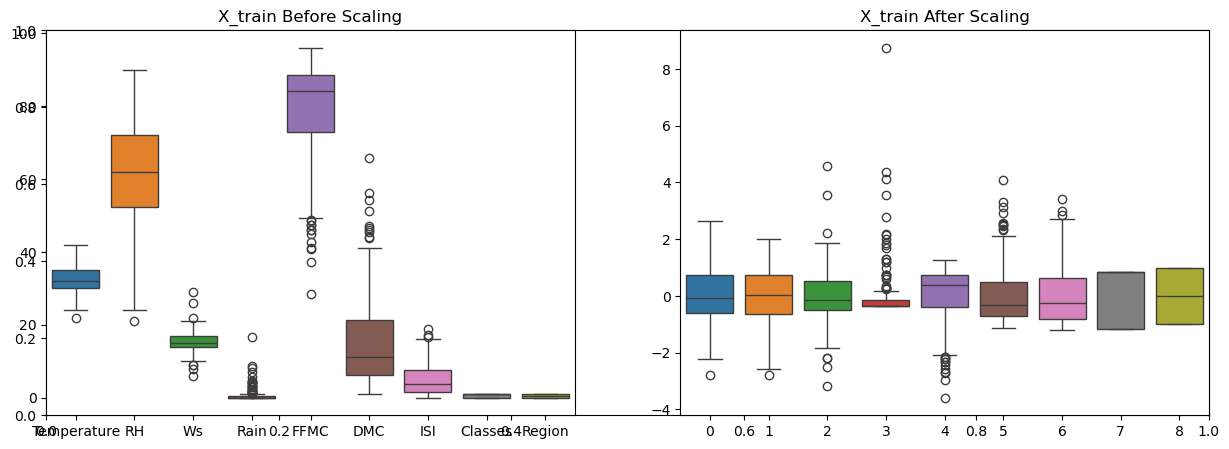

In [321]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaler)
plt.title('X_train After Scaling')

In [392]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaler,y_train)
y_pred=linreg.predict(X_test_scaler)
m=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
m,score

(0.7080454340692299, 0.9813991246626835)

In [394]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
l=Lasso()
l.fit(X_train_scaler,y_train)
y_pred=l.predict(X_test_scaler)
m=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
m,score

(1.1626665590574765, 0.9524019216349232)

In [396]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
r=Ridge()
r.fit(X_train_scaler,y_train)
y_pred=r.predict(X_test_scaler)
m=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
m,score

(0.728582151489591, 0.9807982726897483)

In [398]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
en=ElasticNet()
en.fit(X_train_scaler,y_train)
y_pred=en.predict(X_test_scaler)
m=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
m,score

(1.7839900020995942, 0.8868096501682265)

In [400]:
import pickle

In [402]:
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(r,open('r.pkl','wb'))